# Salary Insights Data Analysis

### The goal of this analysis was to find interesting insights from a really raw database. I worked from scratch of finding the database through research, processed and cleaned it and then worked around ways and techniques to analyze it.  

### I hope you enjoy it  !!!

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

In [33]:
data = pd.read_csv('MSIS_salaries.csv',header = 'infer',)
#world=pd.read_csv('worldcities.xlsx', header='infer')
#xl = pd.ExcelFile('worldcities.xlsx')
#world = xl.parse('Sheet1')
uscities = pd.read_csv('uscities.csv',header = 'infer',)
data1=data.copy()


### Rename Columns

In [34]:
data.rename(columns={'How old are you?':'age','What industry do you work in?':'industry',\
                     'Where are you located? (City/state/country)':'location',\
                     'Job title':'job_title',\
'How many years of post-college professional work experience do you have?':'post_college experience'},inplace=True)


### Data Cleaning Job Title column

In [35]:
data['job_title'] = data['job_title'].str.replace(r'\([^()]*\)',"")
data['job_title']=data['job_title'].str.replace('\d+', '')
data['job_title']=data['job_title'].str.replace('[./\"&-+,$£~-]', '')
data['job_title']=data['job_title'].str.strip()
data.dropna(subset=['job_title'],how='all',inplace=True)
data['job_title']=data['job_title'].str.replace('it ','information technology ')
data['job_title']=data['job_title'].str.replace(' it','information technology')
data['job_title']=data['job_title'].str.replace('it','information technology')
data['job_title']=data['job_title'].str.replace('qa ','quality ')
data['job_title']=data['job_title'].str.replace(' qa',' quality')
data['job_title']=data['job_title'].str.replace('qa','quality')
data['job_title']=data['job_title'].str.replace('ux ','user experience ')
data['job_title']=data['job_title'].str.replace(' ux',' user experience')
data['job_title']=data['job_title'].str.replace('ux','user experience')
data['job_title']=data['job_title'].str.replace('ux ','user experience ')
data['job_title']=data['job_title'].str.replace(' ux',' user experience')
data['job_title']=data['job_title'].str.replace('ux','user experience')
data['job_title']=data['job_title'].str.replace('pr ','public relations ')
data['job_title']=data['job_title'].str.replace(' pr',' public relations')
data['job_title']=data['job_title'].str.replace('rd ','research development ')
data['job_title']=data['job_title'].str.replace(' rd',' research development')
data['job_title']=data['job_title'].str.replace('iii','')
data['job_title']=data['job_title'].str.replace('sr ','senior ')
data['job_title']=data['job_title'].str.replace(' sr',' senior')
data['job_title']=data['job_title'].str.replace('hr ','human resource ')
data['job_title']=data['job_title'].str.replace(' hr',' human resource')
data['job_title']=data['job_title'].str.replace('hr','human resource')
data['job_title']=data['job_title'].str.replace('vp ','vice president ')
data['job_title']=data['job_title'].str.replace(' vp',' vice president')
data['job_title']=data['job_title'].str.replace('vp','vice president')



def jobs_title_change(title):
    title = str(title)
    if ('manager' in title):
        return 'manager'
    if ('director' in title): 
        return 'director'
    if('research' in title):
        return 'researcher'
    if ('admin' in title) or ('associate director' in title):
        return 'administrative tasks'
    if ('analyst' in title):
        return 'analyst'
    if ('engineering' in title) or ('software' in title) or ('technical' in title) or ('information' in title)\
    or ('technology' in title) or ('systems' in title):
        return 'engineer'
    if ('social' in title):
        return 'social worker'
    if ('social' in title):
        return 'social worker'
    if ('consultant' in title):
        return 'consultant'
    return title
data['job_title'] = data['job_title'].apply(lambda x : jobs_title_change(x))


### Cleaning Salary

In [36]:
data = (data.rename(columns = {'What is your annual salary?' :'salary','Please indicate the currency' : 'currency_type'}).\
        assign(annual_salary = lambda x:x.salary.apply(lambda y: str(y).\
                     lower().replace(",",""). replace("$","").replace("k","000 ").replace("million","000000").\
                                                               replace(" ",""))))
data['annual_salary'] = data['annual_salary'].str.extractall('(\d+)')[0].unstack().astype(float).max(1)
data['annual_salary'] = np.where(data.salary.str.contains('month'),data.annual_salary*12,data.annual_salary)

currency_list= data["currency_type"].unique().tolist()
currency_conversion = [1.00,1.26,0.75,1.12,0.11,1.00,0.69,0.092,1.00,0.13,0.067,1.00]

currency_conversion_dict = dict(zip(currency_list,currency_conversion))

data['currency_conversion']=data["currency_type"].map(currency_conversion_dict)
data['annual_salary'] = data["annual_salary"]*data['currency_conversion']

#data.to_csv('annual_salary_imputed.csv')

data.dropna(subset=['annual_salary'],how='all',inplace=True)

data.head()

,Timestamp,age,industry,job_title,salary,currency_type,location,post_college experience,annual_salary,currency_conversion
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst Director,75000,USD,"Nashville, TN",11 - 20 years,75000.0,1.00
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,"65,000",USD,"Madison, Wi",8 - 10 years,65000.0,1.00
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,"36,330",USD,"Las Vegas, NV",2 - 4 years,36330.0,1.00
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years,43596.0,1.26
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker,55000,USD,"Southeast Michigan, USA",5-7 years,55000.0,1.00


### Data Cleaning of Location Column

In [37]:
data['location']=data['location'].str.lower()
data['location'] = data['location'].str.replace('.','')
data['location'] = data['location'].str.replace('/',', ')
data['location'] = data['location'].str.replace(' ','')
data['location'].str.split(',', expand=False)



p = set(uscities['state_id'].str.lower()) 
q = set(uscities['state_name'].str.lower())

states = p.union(q)
x = uscities['state_id']
y = uscities['city']
dd = {}
for j,i in zip(x,y):
    dd[i.lower()] = j.lower()
def priortize_states_countries(s):
    p = set(s)
    for each in p:
        if each in states:
            return [each]       
     # {city--> state code}
    for each in p:
        if each in dd:
            return [dd[each]]
    return s

data['location'] = data['location'].astype(str)
data['location'] = data['location'].apply(lambda x : x.split(","))
data['location'] = data['location'].apply(priortize_states_countries)
data['location'] = data['location'].apply(lambda x: " ".join(x))

data.location.replace(to_replace=['texas','california','washingtondc','ohio','michigan','oregon','florida',
                                'newyorkcity','washington','colorado','illinois','minnesota','nyc',
                                'massachusetts','nan','virginia','newyork','maryland','sanfrancisco',
                                'losangeles','la','sanfrancisco causa','newyork newyork',
                                'washingtondcusa','chicagoilusa','losangeles causa',
                                'washingtonstate','losangelesca','newyorknyusa',
                                'sydneynswaustralia','sanfranciscobayarea','wisconsin',
                                'indiana','arizona','georgia','iowa','pennsylvania','missouri',
                                'unitedstates','utah','usa','newyork nyusa',
                                'unitedkingdom','newjersey',
                                'connecticut','maine','newyork newyork usa','tennessee',
                                'newjersey usa','bricknj','southeastmichigan usa','northcarolina usa',
                                'louisiana','tennessee','vermont','nebraska',
                                  'arkansas','alaska','kansas','montana','northcarolina usa',
                                  'delaware','seattlewa','hawaii','newhampshire','portlandoregon',
                                  'atlantaga','minneapolism','sandiego causa','philadelphiapa',
                                  'portlandor','sandiego','houstontexas','kentucky'],
                    value=['tx','ca','dc','il','nd','il','fl','ny','wa','ak','il',
                           'mn','ny','ma','ny','il','ny','md','ca','ca','ca','ca','ny','dc',
                           'il','ca','wa','ca','ny','australia','ca','wi','in','az','ga','ia','pa',
                           'mo','USA(State Not Mentioned)','ut',
                           'USA(State Not Mentioned)','ny','UK','nj','ct','me','ny','ne','nj','nj',
                           'mi','nc','mo','il','il','ne','tx','al','ks','mt','nc','de','wa','hi','nh','oh','ga','mn',
                            'ca','ph','oh','ca','tx','ky'],inplace=True)


In [38]:
data.head()

,Timestamp,age,industry,job_title,salary,currency_type,location,post_college experience,annual_salary,currency_conversion
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst Director,75000,USD,tn,11 - 20 years,75000.0,1.00
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,"65,000",USD,wi,8 - 10 years,65000.0,1.00
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,"36,330",USD,nv,2 - 4 years,36330.0,1.00
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,34600,GBP,md,5-7 years,43596.0,1.26
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker,55000,USD,mi,5-7 years,55000.0,1.00


### Clean Industry

In [39]:
data['industry'] = data['industry'].str.lower()
data['industry']



def industry_change(industry):
    industry = str(industry)
    if ('education' in industry) or ('higher' in industry) or ('academia' in industry)\
    or ('academic' in industry) or ('educational' in industry):
        return 'Education industry'
    if ('software' in industry) or ('technology' in industry) or ('it' in industry)\
    or ('information' in industry) or ('development' in industry):
        return 'Software industry'
    
    if ('health' in industry) or ('medical' in industry) or ('care' in industry) or ('medicine' in industry)\
    or ('biotech' in industry) or ('pharmaceutical' in industry) or ('biotechnology' in industry) or \
    ('medicine' in industry) or ('pharma' in industry):
        return 'Healthcare Industry'
    
    if ('manufacture' in industry) or ('retail' in industry) or ('consumer' in industry)\
    or ('logistics' in industry) or ('goods' in industry):
        return 'Manufacturing Industry'
    
    if ('finance' in industry) or ('financial' in industry) or ('fintech' in industry):
        return 'Financial Industry'
    
    
    if ('legal' in industry) or ('law' in industry):
        return 'Legal Industry'
    
    if ('insurance' in industry):
        return 'Insurance Industry'
    
    if ('consulting' in industry):
        return 'Consulting Industry'
    
    if ('services' in industry) or ('hospitality' in industry) or ('service' in industry)\
    or ('professional' in industry) or ('social' in industry) or ('transportation' in industry)\
    or ('communication' in industry) or ('contracting' in industry) or ('fundraiser' in industry):
        return 'Services industry'
    
    if ('ecommerce' in industry):
        return 'Ecommerce Industry'
    
    if ('marketing' in industry) or ('sales' in industry) or ('market' in industry):
        return 'Marketing Industry'
    
    if ('gas' in industry) or ('oil' in industry):
        return 'gas and oil Industry'
    
    if ('constructing' in industry) or ('real' in industry) or ('estate' in industry)\
    or ('architecture' in industry) or ('civil' in industry):
        return 'Marketing Industry'
    
    if ('media' in industry) or ('advertising' in industry) or ('entertainment' in industry)\
    or ('arts' in industry) or ('journalism' in industry):
        return 'Media Industry'
    
    if ('telecommunications' in industry) or ('engineering' in industry) or ('digital' in industry)\
    or ('devices' in industry) or ('design' in industry)\
    or ('electronics' in industry) or ('semiconductor' in industry) or ('engineering' in 'development'):
        return 'Engineering Industry'
    if ('research' in industry) or ('development' in industry):
        return 'R&D Industry'
    if ('management' in industry) or ('human' in industry) or ('resources' in industry)\
    or ('relations' in industry) or ('hr' in industry):
        return 'Management Industry'
    
   
    
    return industry

#worked with srivatsav

### Drop NAN in Job Title

In [40]:
data.dropna(how='any',subset=['job_title'],inplace=True)

In [41]:
% autosave 1

Autosaving every 1 seconds


In [42]:
#data.describe()


### 1. Data Description

In [43]:
data1.shape



(20268, 8)

### 2. Filetered the job titles that have more than 7% of entries.

In [44]:
Job_title = pd.DataFrame(data1['Job title'].value_counts())
Total_length = len(data1['Job title']) - data1['Job title'].isna().sum()
Job_title["percent_value"] = Job_title.apply(lambda x : (x/Total_length) *100)
Job_title[Job_title.percent_value>0.7]

,Job title,percent_value
Director,190,1.055028
Project Manager,183,1.016159
Manager,134,0.744072


### 3. Created a histogram of NA counts (by column).

In [45]:
len(data)

18004

In [46]:
data1.isna().sum()


Timestamp                                                                      0
How old are you?                                                            2258
What industry do you work in?                                               2680
Job title                                                                   2259
What is your annual salary?                                                 2259
Please indicate the currency                                                2258
Where are you located? (City/state/country)                                 2980
How many years of post-college professional work experience do you have?    2258
dtype: int64

(array([1., 0., 0., 0., 0., 5., 2.]),
 array([   0.        ,  425.71428571,  851.42857143, 1277.14285714,
        1702.85714286, 2128.57142857, 2554.28571429, 2980.        ]),
 <a list of 7 Patch objects>)

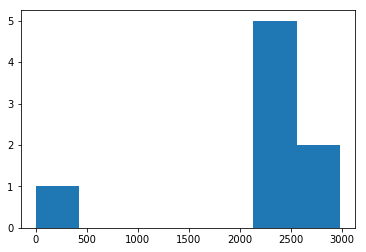

In [47]:
plt.hist(data1.isna().sum(),bins = 7)

Most of the columns has NA's over 2000

### 4 Compared the distribution of the highest on average paying job title and the lowest average paying job title. 

In [48]:
data['job_title'] = data['job_title'].str.strip()

x= data.groupby('job_title').aggregate(np.count_nonzero)

x1 = x[x['industry'] >= 5].index
data = data[data['job_title'].isin(x1)]




In [49]:
a=data.groupby('job_title')['annual_salary'].mean().nlargest(1)
b=data.groupby('job_title')['annual_salary'].mean().nsmallest(1)
print(a)
print(b)


job_title
HR Generalist    3.442098e+06
Name: annual_salary, dtype: float64
job_title
Office Assistant    25330.0
Name: annual_salary, dtype: float64


In [50]:
data['location'].fillna("Not Mentioned",inplace=True)

### 5. Created a column that assigns each row a unique identifier (and id number). Renamed columns into [Identifier], [age], [industry], [job_title], [currency], [location], and [post_college experience].

In [51]:
data['identifier']=data.index.values
data.head()

data.rename(columns={'identifier':'Identifier','How old are you?':'age','What industry do you work in?':'industry','Job title':'job_title',\
'Please indicate the currency':'currency','Where are you located? (City/state/country)':'location',\
'How many years of post-college professional work experience do you have?':'post_college experience'}, inplace=True)
data.head()


,Timestamp,age,industry,job_title,salary,currency_type,location,post_college experience,annual_salary,currency_conversion,Identifier
1,4/24/2019 11:43:26,25-34,environmental nonprofit,Operations Director,"65,000",USD,wi,8 - 10 years,65000.0,1.00,1
3,4/24/2019 11:43:27,25-34,biotechnology,Senior Scientist,34600,GBP,md,5-7 years,43596.0,1.26,3
4,4/24/2019 11:43:29,25-34,healthcare,Social worker,55000,USD,mi,5-7 years,55000.0,1.00,4
6,4/24/2019 11:43:30,25-34,nonprofit,Development Manager,"51,000",USD,tx,2 - 4 years,51000.0,1.00,6
8,4/24/2019 11:43:34,35-44,libraries,Director,45000,USD,ks,8 - 10 years,45000.0,1.00,8


### 6. Used the identifiers that were created from section 4. Found entries that contain annual salaries that are over 60,000 (also can be shown as 60000) and have less or equal to 5 years of professional work experience. Show your findings in one table and show at least 11 rows of that table.

# drop nas from the what is your annual salary columns

### 7. Created a new column that shows true of false on whether their job tiltes are Data Scientist or containing "Data Scien". Showed how many of them are there in this data set and what location contained the most of them. If two or more locations have the same amount of results, showed all of them. Showed findings in one table.

In [52]:
data['data_science_column']=(data.job_title=='data scientist')|(data.job_title.str.contains('data scien'))
#data_new.groupby('location3')['location3'].count().nlargest(1)
data[data['data_science_column']==True].groupby('location').count().sort_values(by='location',ascending=False).head(1)

,Timestamp,age,industry,job_title,salary,currency_type,post_college experience,annual_salary,currency_conversion,Identifier,data_science_column
location,,,,,,,,,,,


### 8. If you are over or equal to 25 years old, found out what is the probability that you make over or equal to 100k. Used statistical framework to show how you can achieve that goal by taking advantages of your location, industry and professional experience.

In [53]:
dumDF=pd.get_dummies(data, columns=['age'])
dumDF=dumDF[(dumDF['age_25-34']==1)|\
        (dumDF['age_35-44']==1)|\
        (dumDF['age_45-54']==1)|\
        (dumDF['age_55-64']==1)|\
        (dumDF['age_65 or over']==1)]
# def event_probability(event_outcomes, sample_space):
#     probability = (event_outcomes / sample_space) * 100
#     return (probability, 1)


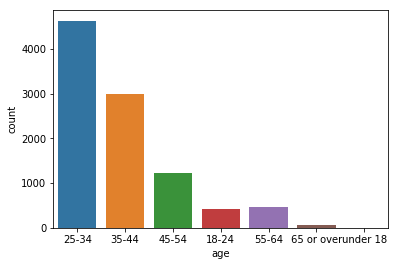

In [54]:
sns.countplot(x='age', data=data)

### 9. Find 3 interesting insights from the data set. Write a brief report on these insights as if you are going to present to the corresponding HR data science team in your company. The report should be written in a Jupyter Notebook using markdown, and should not be excessively long. Show your findings, mention the model or technique used to identify each finding, but do not go into details about your code.


#### Insight 1:Distribution of salary based on states

In [55]:
dumDF = pd.get_dummies(data, columns=['location'])

In [56]:
dumDF=dumDF[dumDF.location_ca==1]

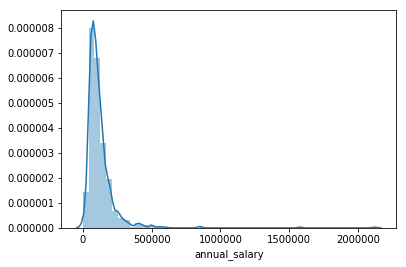

In [57]:
sns.distplot(dumDF.annual_salary, bins=50)

In [58]:
dumDF = pd.get_dummies(data, columns=['location'])
dumDF=dumDF[dumDF.location_ny==1]

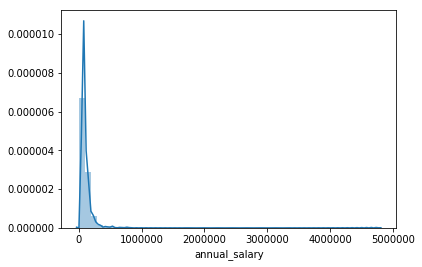

In [59]:
sns.distplot(dumDF.annual_salary, bins=50)

In [60]:
dumDF = pd.get_dummies(data, columns=['location'])
dumDF=dumDF[dumDF.location_wa==1]

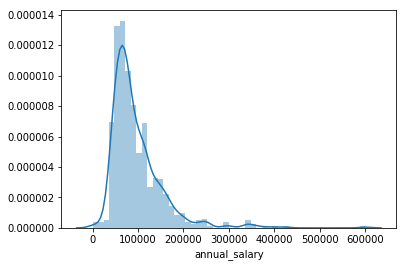

In [61]:
sns.distplot(dumDF.annual_salary, bins=50)

#### Conclusion: Build the office in New York as the salary distribution is more in less salaries

### Insight 2

#### Industries where the people will tend to get in for higher salaries

In [62]:
top8industries=data.groupby('industry')['annual_salary'].mean().nlargest(8)
top8industries

industry
property                 1.320000e+08
administrative           1.766944e+06
telecom                  7.600000e+05
high tech software       7.500000e+05
construction             6.303782e+05
investment banking       5.900000e+05
public administration    5.710000e+05
telecom                  5.509766e+05
Name: annual_salary, dtype: float64

In [63]:
type(data.groupby('industry')['annual_salary'].sum().nlargest(8))


pandas.core.series.Series

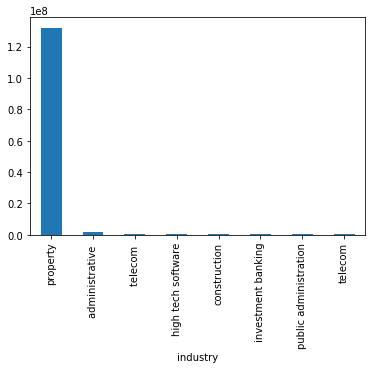

In [64]:
top8industries.plot(kind = 'bar')

#### Conclusion:People can prefer to work in Property industry as the average pay is more in that industry

### Insight 3

#### Salary distribution according to the Post College Experience

C:\Users\Bhagyashri\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


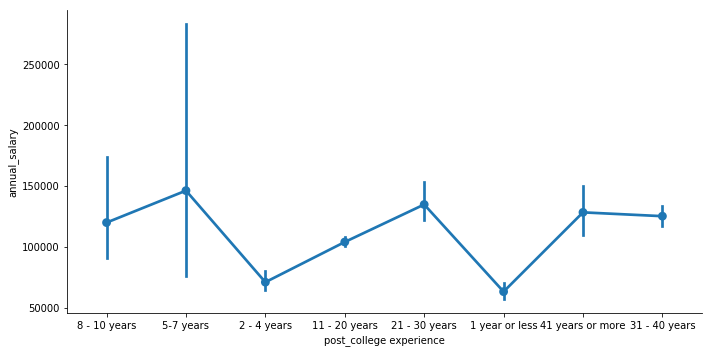

In [65]:
sns.factorplot(y='annual_salary', data=data, x='post_college experience',aspect=2)

#### Conclusion: It is surprising that your salary doesn't depend on your work experience

### 10. Create a regression model to to predict a person's salary.

In [66]:
#CELL1
data1=data.copy()
data1.head()

#Cell2
data1['age'] = data1['age'].astype('category')
data1['industry'] = data1['industry'].astype('category')
data1['job_title'] = data1['job_title'].astype('category')
data1['currency_type'] = data1['currency_type'].astype('category')
data1['post_college experience'] = data1['post_college experience'].astype('category')
data1['location'] = data1['location'].astype('category')


print(data1.dtypes)
cat_columns = data1.select_dtypes(['category']).columns
data1[cat_columns] = data1[cat_columns].apply(lambda x: x.cat.codes)
 
#CELL3
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
regLasso = linear_model.Lasso()

#CELL4
X =data1[['age', 'industry', 'job_title','post_college experience','location']]
Y= data1['annual_salary']

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = Y[:-20]
y_test = Y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Timestamp                    object
age                        category
industry                   category
job_title                  category
salary                       object
currency_type              category
location                   category
post_college experience    category
annual_salary               float64
currency_conversion         float64
Identifier                    int64
data_science_column            bool
dtype: object
Coefficients: 
 [5258.45692241   15.47706013  -33.04678945 7567.63987786 -117.64820984]
Mean squared error: 7690966776.33
Variance score: -0.13


### 11. Create a classification model to to predict a person's job title.

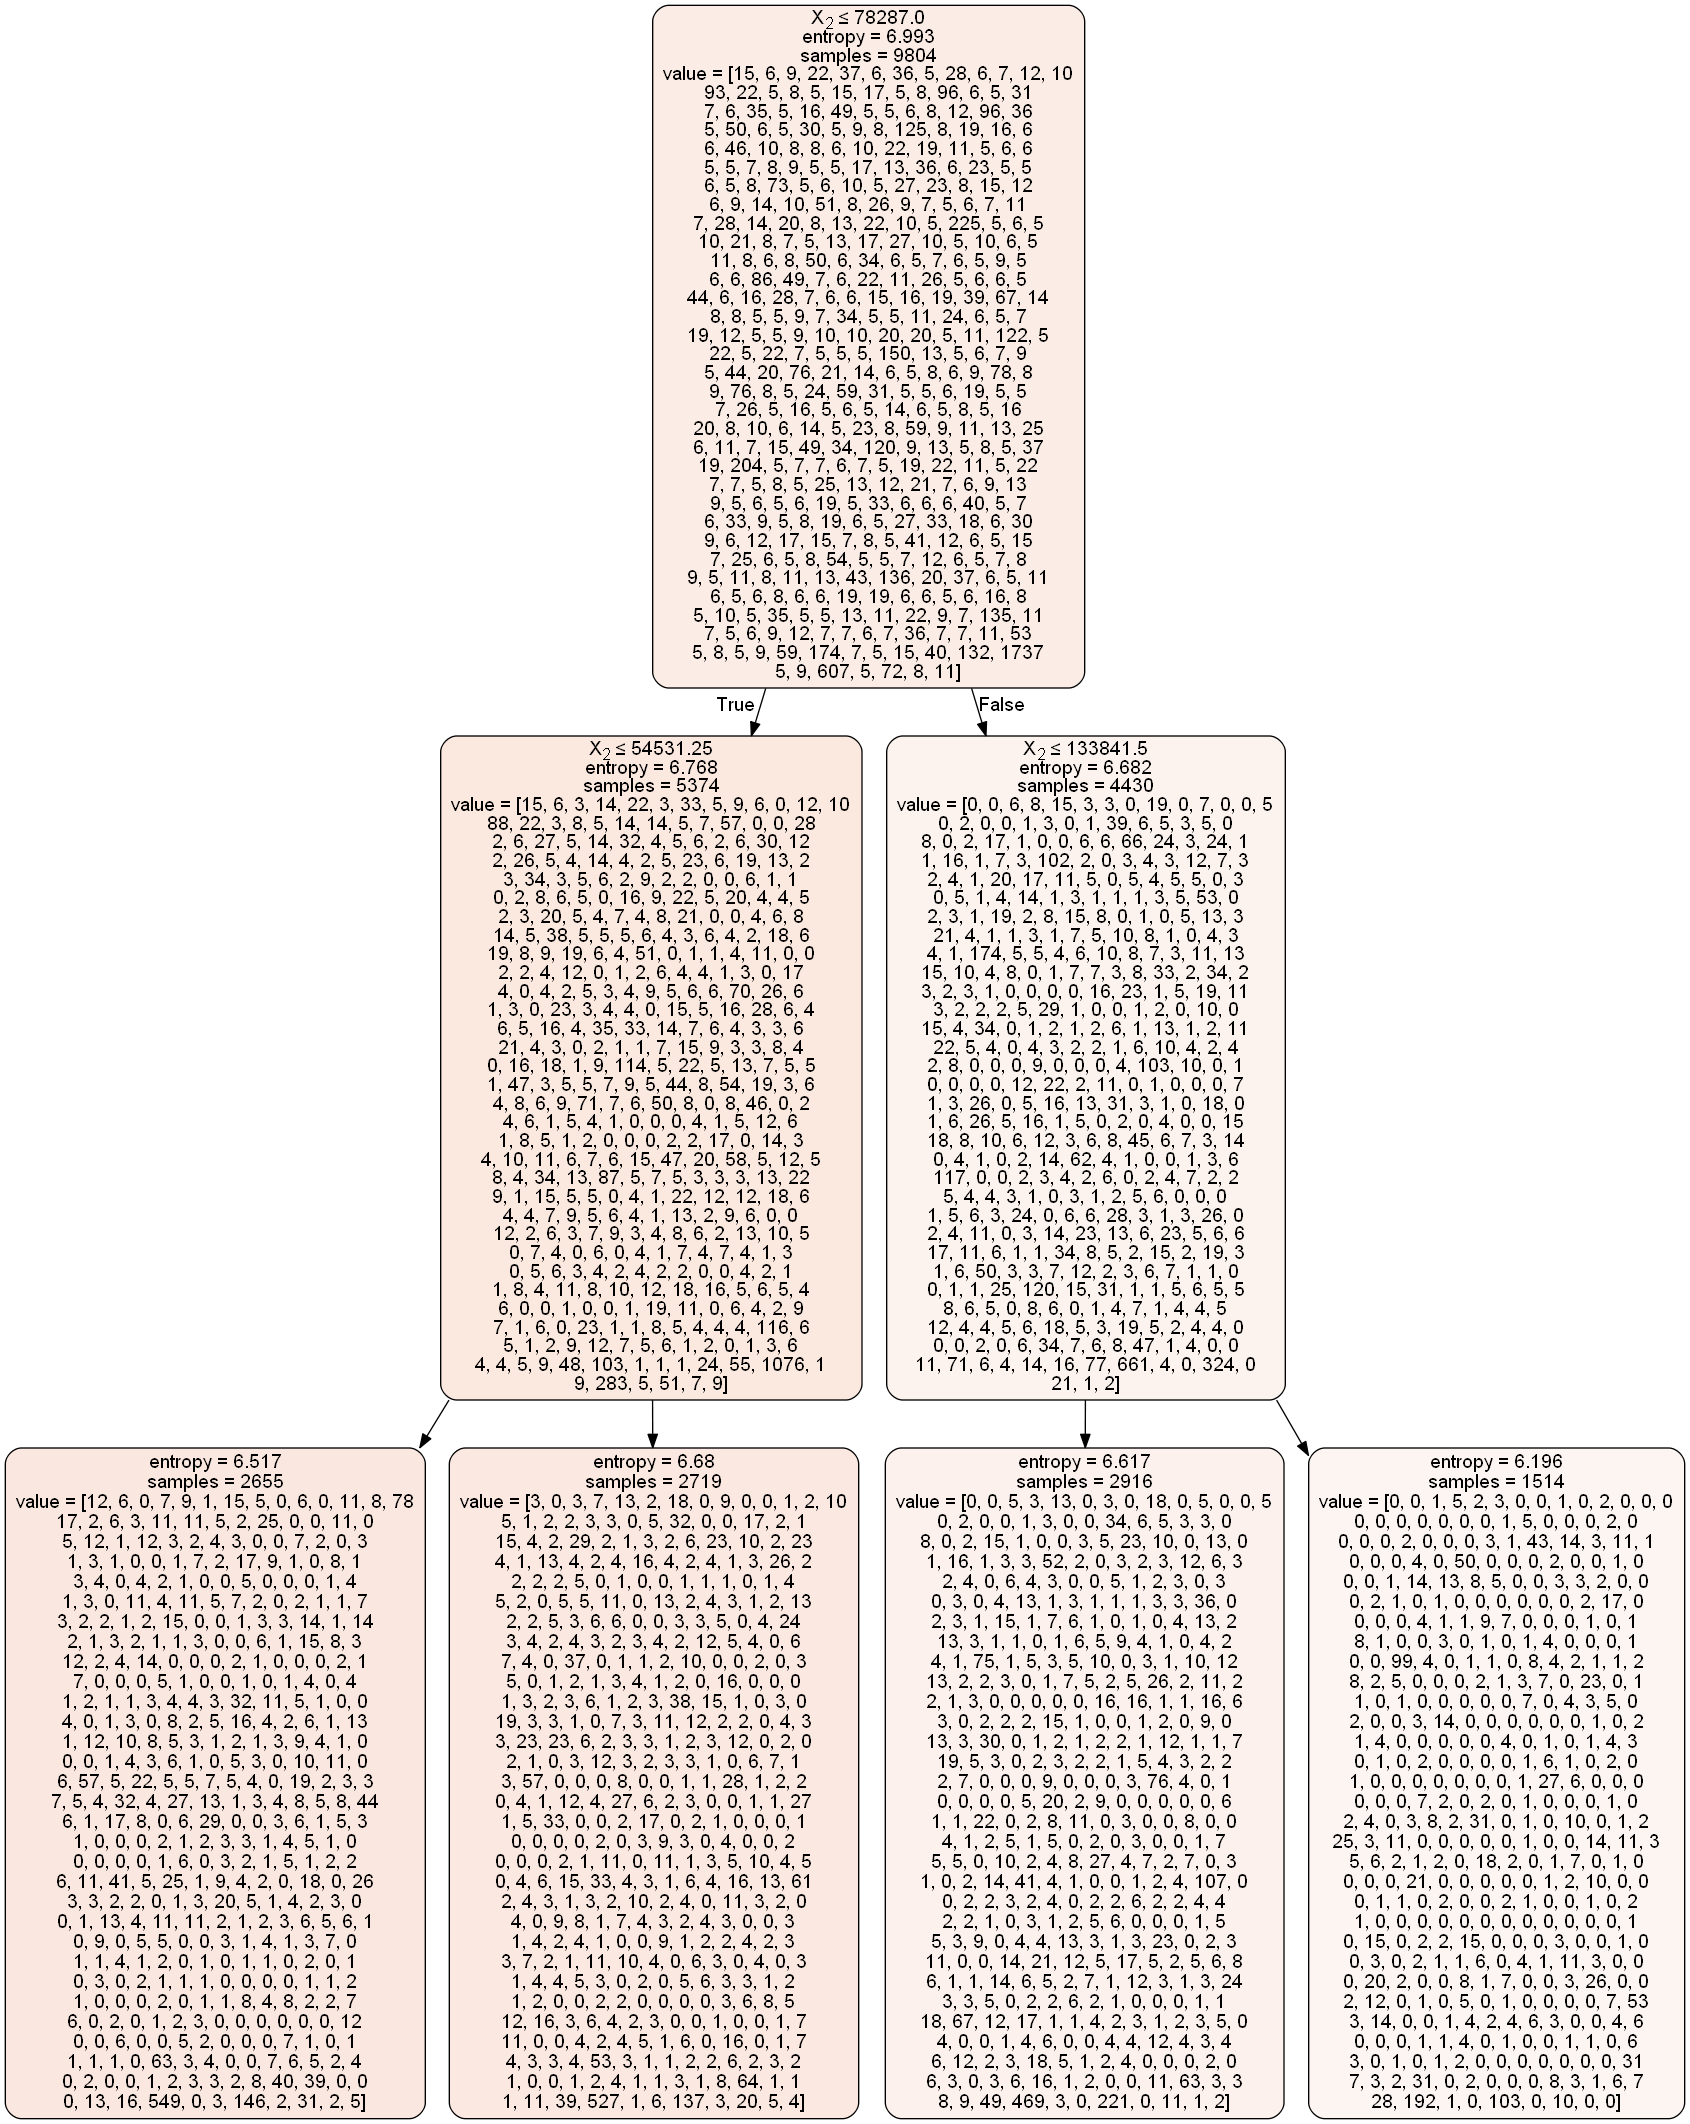

In [67]:
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image  
import pydotplus
from io import StringIO 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')

data2=data.copy()
data2.head()

data2['age'] = data2['age'].astype('category')
data2['industry'] = data2['industry'].astype('category')
data2['job_title'] = data2['job_title'].astype('category')
data2['currency_type'] = data2['currency_type'].astype('category')
data2['post_college experience'] = data2['post_college experience'].astype('category')
data2['location'] = data2['location'].astype('category')
#data2['Country'] = data2['Country'].astype('category')

#print(data2.dtypes)
cat_columns = data2.select_dtypes(['category']).columns
data2[cat_columns] = data2[cat_columns].apply(lambda x: x.cat.codes)

# data1.drop(['salary','Please indicate the currency'],axis=1,inplace=True)
X =data2[['age', 'industry', 'annual_salary','currency_type','post_college experience','location']]
Y= data2['job_title']

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = Y[:-20]
y_test = Y[-20:]

dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=2, min_samples_leaf=10)
dtc = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
#print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

# Visualization of Decision Tree
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



In [68]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data3 = data.copy()

data3['age'] = data3['age'].astype('category')
data3['industry'] = data3['industry'].astype('category')
data3['job_title'] = data3['job_title'].astype('category')
data3['currency_type'] = data3['currency_type'].astype('category')
data3['post_college experience'] = data3['post_college experience'].astype('category')
data3['location'] = data3['location'].astype('category')
data3['location'] = data3['location'].astype('category')
data3['annual_salary'] = data3['annual_salary'].astype('category')

print(data3.dtypes)
cat_columns = data3.select_dtypes(['category']).columns
data3[cat_columns] = data3[cat_columns].apply(lambda x: x.cat.codes)
data3 = data3.drop(['Timestamp','salary'],axis=1)
clt = KMeans(n_clusters = len(data3.age.unique()))
y = clt.fit(data3)
x = clt.fit_predict(data3)
data3['clusters']=x
data3['clusters'].unique() 



Timestamp                    object
age                        category
industry                   category
job_title                  category
salary                       object
currency_type              category
location                   category
post_college experience    category
annual_salary              category
currency_conversion         float64
Identifier                    int64
data_science_column            bool
dtype: object


array([2, 4, 1, 6, 0, 5, 3], dtype=int64)